# Packages

In [1]:
import warnings # Serve para ignorar mensagens de alerta que aparecem 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pickle
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

from tqdm import tqdm

from pycaret.regression import *

In [3]:
from utils.model_summary_functions import feature_importance, metrics, summary_plot,multivariate_importance

In [4]:
plt.rcParams.update({
    'font.size': 18,
    'axes.linewidth':2,
    'axes.titlesize': 20,
    'lines.linewidth' : 1.5,
    'lines.markersize' : 10,
    'figure.figsize': (25,10),
    'xtick.labelsize': 15, 
    'ytick.labelsize': 15,
    'font.family': 'Arial',
    'legend.fontsize':14,
    'axes.labelsize':20,
    'axes.grid':True,
})

# Importing the dataset

In [5]:
#df = pd.read_csv('dataframe_time_series/df_time_series_0.csv', index_col=[0])
df = pd.read_csv('dataframe_time_series/df_time_series_91.csv', index_col=[0])

In [6]:
df

,t,t_p1_40samples,t_p2_40samples,t_p3_40samples,t_p4_40samples,t_p5_40samples,t_p6_40samples,t_p7_40samples,t_p8_40samples,t_p9_40samples,t_p10_40samples,t_p11_40samples,t_p12_40samples,t_p13_40samples,t-1,t-2,t-3,t-4,t+29
43,-0.263501,-0.123109,0.380283,0.585915,0.343296,0.399714,0.553041,0.512991,-1.291559,2.946962,1.164339,-3.246833,-2.788563,1.091735,-0.339069,-0.401089,-0.446135,-0.470760,0.381387
44,-0.177448,-0.116060,0.376579,0.579501,0.335822,0.394058,0.553041,0.489846,-1.278017,3.019755,1.173414,-3.395304,-2.893525,1.091735,-0.263501,-0.339069,-0.401089,-0.446135,0.435153
45,-0.083546,-0.106267,0.372179,0.569493,0.324322,0.387053,0.553041,0.450962,-1.268426,3.133662,1.193421,-3.642252,-3.051943,1.091735,-0.177448,-0.263501,-0.339069,-0.401089,0.456777
46,0.015828,-0.093506,0.367365,0.555056,0.308087,0.379078,0.553041,0.395125,-1.268911,3.289339,1.230424,-4.054034,-3.294826,1.091735,-0.083546,-0.177448,-0.263501,-0.339069,0.442016
47,0.118263,-0.077654,0.362446,0.545698,0.297786,0.370672,0.553041,0.324671,-1.284481,3.413347,1.244758,-4.773393,-3.834797,1.091735,0.015828,-0.083546,-0.177448,-0.263501,0.390057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5965,0.964688,0.174842,0.531798,0.655219,0.429312,0.559803,0.976007,0.230573,-1.499807,2.421205,1.303954,3.201767,2.455428,1.456610,0.906209,0.831078,0.740032,0.634651,-0.235216
5966,1.006480,0.176188,0.533830,0.655899,0.430204,0.562154,1.006480,0.237585,-1.490355,2.417813,1.306716,3.190642,2.441725,1.487083,0.964688,0.906209,0.831078,0.740032,-0.344555
5967,1.032164,0.177609,0.536025,0.656608,0.431134,0.564684,1.032164,0.245683,-1.478532,2.414452,1.309765,3.179375,2.427439,1.512767,1.006480,0.964688,0.906209,0.831078,-0.399071
5968,1.042898,0.179281,0.538612,0.657440,0.432228,0.567666,1.042898,0.255075,-1.464947,2.410501,1.313349,3.166349,2.410897,1.523500,1.032164,1.006480,0.964688,0.906209,-0.404259


In [7]:
df_train = df[:5400]
df_test = df[5400:]

In [8]:
df_train

,t,t_p1_40samples,t_p2_40samples,t_p3_40samples,t_p4_40samples,t_p5_40samples,t_p6_40samples,t_p7_40samples,t_p8_40samples,t_p9_40samples,t_p10_40samples,t_p11_40samples,t_p12_40samples,t_p13_40samples,t-1,t-2,t-3,t-4,t+29
43,-0.263501,-0.123109,0.380283,0.585915,0.343296,0.399714,0.553041,0.512991,-1.291559,2.946962,1.164339,-3.246833,-2.788563,1.091735,-0.339069,-0.401089,-0.446135,-0.470760,0.381387
44,-0.177448,-0.116060,0.376579,0.579501,0.335822,0.394058,0.553041,0.489846,-1.278017,3.019755,1.173414,-3.395304,-2.893525,1.091735,-0.263501,-0.339069,-0.401089,-0.446135,0.435153
45,-0.083546,-0.106267,0.372179,0.569493,0.324322,0.387053,0.553041,0.450962,-1.268426,3.133662,1.193421,-3.642252,-3.051943,1.091735,-0.177448,-0.263501,-0.339069,-0.401089,0.456777
46,0.015828,-0.093506,0.367365,0.555056,0.308087,0.379078,0.553041,0.395125,-1.268911,3.289339,1.230424,-4.054034,-3.294826,1.091735,-0.083546,-0.177448,-0.263501,-0.339069,0.442016
47,0.118263,-0.077654,0.362446,0.545698,0.297786,0.370672,0.553041,0.324671,-1.284481,3.413347,1.244758,-4.773393,-3.834797,1.091735,0.015828,-0.083546,-0.177448,-0.263501,0.390057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5438,-0.565568,-0.550072,0.252412,0.720785,0.519531,0.605220,0.967184,-0.192998,-1.367550,2.000203,1.164934,-1.100256,-0.944479,0.763004,-0.619376,-0.674450,-0.730709,-0.787730,0.472336
5439,-0.513347,-0.555071,0.249640,0.724702,0.525193,0.608624,0.967184,-0.160643,-1.329286,1.975389,1.158859,-1.096481,-0.946173,0.763004,-0.565568,-0.619376,-0.674450,-0.730709,0.491328
5440,-0.463549,-0.558138,0.247736,0.727127,0.528714,0.610648,0.967184,-0.142134,-1.298792,1.960234,1.154969,-1.094081,-0.947282,0.763004,-0.513347,-0.565568,-0.619376,-0.674450,0.504825
5441,-0.417536,-0.559733,0.246617,0.728412,0.530585,0.611654,0.967184,-0.134274,-1.280604,1.952290,1.152793,-1.092761,-0.947925,0.763004,-0.463549,-0.513347,-0.565568,-0.619376,0.510451


In [9]:
# Initialize Pycaret
s = setup(data = df_train,
              test_data = df_test, 
              target = df_train.columns[-1], 
              data_split_shuffle = False,
              use_gpu = True,
              fold_strategy = 'timeseries',
              preprocess = False,
              fold = 5,
              silent=True,
              session_id = 123,
              verbose=False) # testing for predicting one time series

In [34]:
# Training all models from the above list with the exception of three and get the best 3
best_model = compare_models(sort = 'MAE',
                      #exclude=['lar','par','dt','knn','llar','lasso','en','xgboost','omp','rf'],
                      round = 3,
                      n_select = 14)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.529,0.435,0.659,-0.032,0.410,1.434,0.008
en,Elastic Net,0.529,0.435,0.659,-0.032,0.410,1.434,0.008
llar,Lasso Least Angle Regression,0.529,0.435,0.659,-0.032,0.410,1.434,0.008
omp,Orthogonal Matching Pursuit,0.538,0.452,0.671,-0.071,0.403,1.681,0.008
br,Bayesian Ridge,0.548,0.462,0.679,-0.103,0.379,2.063,0.010
huber,Huber Regressor,0.549,0.466,0.682,-0.112,0.367,2.238,0.066
ridge,Ridge Regression,0.553,0.472,0.686,-0.130,0.374,2.178,0.008
ada,AdaBoost Regressor,0.554,0.473,0.687,-0.138,0.379,1.702,0.360
gbr,Gradient Boosting Regressor,0.560,0.499,0.705,-0.186,0.342,2.325,0.914
lr,Linear Regression,0.565,0.493,0.701,-0.184,0.369,2.379,0.008


In [36]:
best_model[13]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=0)

In [39]:
# Hyperparameter tuning with optuna 

best_model_tuned = tune_model(best_model[13], 
                                      n_iter = 3000,
                                      search_library='optuna',
                                      #search_algorithm='tpe',
                                      optimize = 'MAE',
                                      verbose=False,
                                      choose_better=True)

In [40]:
best_model_tuned

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7643337447182449, gamma=0,
             gpu_id=0, importance_type='gain', interaction_constraints='',
             learning_rate=0.03742588675164517, max_delta_step=0, max_depth=1,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=54, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123,
             reg_alpha=9.912591733023739, reg_lambda=0.035920795135789545,
             scale_pos_weight=12.01650593651308, subsample=0.6346675021055186,
             tree_method='gpu_hist', validate_parameters=1, verbosity=0)

## Visualizing prediction

In [41]:
# generate predictions for the entire dataset
predictions = predict_model(best_model_tuned, data=df)
predictions['time_step'] = predictions.index - predictions.index.min() + 1
predictions

,t,t_p1_40samples,t_p2_40samples,t_p3_40samples,t_p4_40samples,t_p5_40samples,t_p6_40samples,t_p7_40samples,t_p8_40samples,t_p9_40samples,...,t_p11_40samples,t_p12_40samples,t_p13_40samples,t-1,t-2,t-3,t-4,t+29,Label,time_step
43,-0.263501,-0.123109,0.380283,0.585915,0.343296,0.399714,0.553041,0.512991,-1.291559,2.946962,...,-3.246833,-2.788563,1.091735,-0.339069,-0.401089,-0.446135,-0.470760,0.381387,0.118195,1
44,-0.177448,-0.116060,0.376579,0.579501,0.335822,0.394058,0.553041,0.489846,-1.278017,3.019755,...,-3.395304,-2.893525,1.091735,-0.263501,-0.339069,-0.401089,-0.446135,0.435153,0.118195,2
45,-0.083546,-0.106267,0.372179,0.569493,0.324322,0.387053,0.553041,0.450962,-1.268426,3.133662,...,-3.642252,-3.051943,1.091735,-0.177448,-0.263501,-0.339069,-0.401089,0.456777,0.118195,3
46,0.015828,-0.093506,0.367365,0.555056,0.308087,0.379078,0.553041,0.395125,-1.268911,3.289339,...,-4.054034,-3.294826,1.091735,-0.083546,-0.177448,-0.263501,-0.339069,0.442016,0.118195,4
47,0.118263,-0.077654,0.362446,0.545698,0.297786,0.370672,0.553041,0.324671,-1.284481,3.413347,...,-4.773393,-3.834797,1.091735,0.015828,-0.083546,-0.177448,-0.263501,0.390057,0.118195,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5965,0.964688,0.174842,0.531798,0.655219,0.429312,0.559803,0.976007,0.230573,-1.499807,2.421205,...,3.201767,2.455428,1.456610,0.906209,0.831078,0.740032,0.634651,-0.235216,0.026871,5923
5966,1.006480,0.176188,0.533830,0.655899,0.430204,0.562154,1.006480,0.237585,-1.490355,2.417813,...,3.190642,2.441725,1.487083,0.964688,0.906209,0.831078,0.740032,-0.344555,0.026871,5924
5967,1.032164,0.177609,0.536025,0.656608,0.431134,0.564684,1.032164,0.245683,-1.478532,2.414452,...,3.179375,2.427439,1.512767,1.006480,0.964688,0.906209,0.831078,-0.399071,0.022373,5925
5968,1.042898,0.179281,0.538612,0.657440,0.432228,0.567666,1.042898,0.255075,-1.464947,2.410501,...,3.166349,2.410897,1.523500,1.032164,1.006480,0.964688,0.906209,-0.404259,0.022373,5926


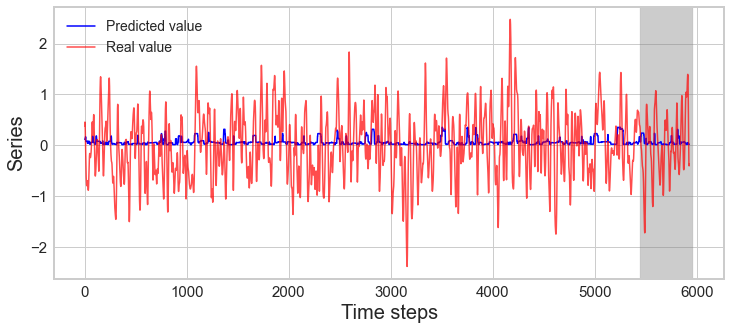

In [42]:
# Plotting the entire dataset
plt.figure(figsize=(12,5))
plt.plot(predictions.time_step,predictions['Label'],color='blue',label='Predicted value')
plt.plot(predictions.time_step,predictions[df.columns[-1]],color='red',alpha=0.7,label='Real value')
plt.xlabel('Time steps')
plt.ylabel('Series')
plt.legend()

# add a vertical rectange for test-set separation
plt.axvspan(xmin=df_test.index[0], xmax = df_test.index[-1],color='grey',alpha=0.4)

(5400.0, 6000.0)

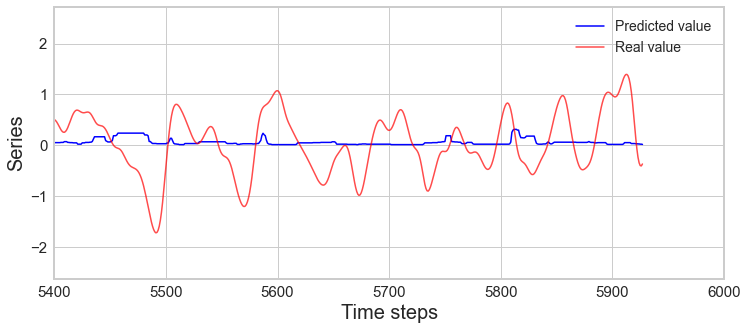

In [43]:
# Plotting only the test set

plt.figure(figsize=(12,5))
plt.plot(predictions.time_step,predictions['Label'],color='blue',label='Predicted value')
plt.plot(predictions.time_step,predictions[df.columns[-1]],color='red',alpha=0.7,label='Real value')
plt.xlabel('Time steps')
plt.ylabel('Series')
plt.legend()
plt.xlim([5400,6000])
#plt.ylim([-10,9])

In [44]:
metrics(predictions['Label'],predictions[df.columns[-1]])

MSE:0.4046582313191265 
MAE:0.5169084005392005 
R2:-96.48427236970683


In [18]:
sdfsdfsdgse

NameError: name 'sdfsdfsdgse' is not defined

# Training all time series

In [ ]:
all_results = [] # Save the MAE result for each HORIZON value to determine how far we can forecast
final_model = {}

eigenvectors = np.arange(0,93,1)

for i in tqdm(eigenvectors):
    
    # Import the dataset of a specific eigenvector to forecast
    path = 'dataframe_time_series/df_time_series_{}.csv'.format(i)
    dataframe = pd.read_csv(path, index_col=[0])
    dataframe_train = dataframe[:5400]
    dataframe_test = dataframe[5400:]    
        
    # Initialize Pycaret
    s = setup(data = dataframe_train,
                     test_data = dataframe_test, 
                     target = dataframe_train.columns[-1], 
                     data_split_shuffle = False,
                     use_gpu = True,
                     fold_strategy = 'timeseries',
                     preprocess = False,
                     fold = 5,
                     silent=True,
                     session_id = 123,
                     verbose=False) # testing for predicting one time series
        
    # Test and compare different ML models and choose the best
    best_model = compare_models(sort = 'MAE',
                                    exclude=['lar','ada','llar','rf','par','lightgbm','en','et'],
                                    n_select = 1,
                                    verbose=True) 
    
    # Hyperparameter tuning with optuna 
    best_model_tuned = tune_model(best_model, 
                                      n_iter = 300,
                                      search_library='optuna',
                                      #search_algorithm='tpe',
                                      optimize = 'MAE',
                                      verbose=False,
                                      choose_better=True)
    
    
    # Capture the result grid and store best model in list
    p = pull().iloc[0:1]
    p['time_series'] = str(i)
    all_results.append(p)
    
    # Save the model
    f = finalize_model(best_model_tuned) # finalize model i.e fit on entire dataset including test set
    final_model[i] = f # Attach final model to a dictionary
    save_model(f, model_name='trained_models_Kuramoto/' + str(i), verbose=False) # pickle the trained model into this folder
    
# Source: https://towardsdatascience.com/multiple-time-series-forecasting-with-pycaret-bc0a779a22fe 

In [ ]:
# Display the best model results for each time series.

concat_results = pd.concat(all_results,axis=0)
concat_results.head(10)

In [ ]:
concat_results.tail(10)

In [ ]:
plt.plot(concat_results['time_series'],concat_results['MAE'])
plt.tight_layout()
plt.ylabel('MAE')
plt.xlabel('Eigenvector number')
plt.title('Forecasting MAE for each time series')
#plt.ylim([0,1])

Traditional ML models have an easier time fitting the first eigenvectors compared to the last eigenvectors. This is due to three main reasons:

-  The last eigenvectors have larger frequency compared to the first. The trained models have difficulty in accurately fitting these sudden changes

-  Small forecasting windows allows linear models to perform well because these segments exhibit linear behaviour 

-  For the last eigenvectors, the faster frequency makes it so that the relationship cannot be approximated so well by linear functions. This explains the decrease in $R^2$ with the eigenvector number worse results. 


**Conclusions**:

- A better overall performance can be obtained by decreasing the forecasting horizon. In this case, the performance of the first eigenvectors will be about the same, but the last eigenvectors will be substantially better.

## Loading trained models

In [ ]:
# Now let’s create a loop to load the trained pipelines and use the predict_model function to generate prediction labels.

all_score_df = []

for i in tqdm(eigenvectors):
    l = load_model('trained_models_Kuramoto/' + str(i), verbose=False)

    # Import the dataset of a specific eigenvector to forecast
    path = 'dataframe_time_series/df_time_series_{}.csv'.format(i)
    dataframe = pd.read_csv(path, index_col=[0])
    dataframe_train = dataframe[:5400]
    dataframe_test = dataframe[5400:] 

    p = predict_model(l, data=dataframe_test)
    all_score_df.append(p)

concat_df = pd.concat(all_score_df, axis=1)
#print(concat_df.shape)
#concat_df.head(10)

In [ ]:
# Plot comparison for test dataset - first eigenvectors

for i in tqdm(range(5)):
    l = load_model('trained_models_Kuramoto/' + str(i), verbose=False)
    p = predict_model(l, data=dataframe_test)
    
    # Import the dataset of a specific eigenvector to forecast
    path = 'dataframe_time_series/df_time_series_{}.csv'.format(i)
    dataframe = pd.read_csv(path, index_col=[0])
    dataframe_train = dataframe[:5400]
    dataframe_test = dataframe[5400:]   
    
    # Plotting
    plt.figure(figsize=(12,5))
    
    plt.plot(p['Label'],color='blue',label='Predicted value')
    plt.plot(p[dataframe.columns[-1]],color='red',alpha=0.7,label='Real value')
    
    plt.title('Eigenvector' + str(i))
    plt.xlabel('Time steps')
    plt.ylabel('Series')
    plt.legend()
    #plt.xlim([30000,34000])
    #plt.ylim([-10,9])

In [ ]:
# Plot comparison for test dataset - last few eigenvectors

for i in tqdm(range(5)):
    
    i = len(eigenvectors) - 5 + i
    l = load_model('trained_models_Kuramoto/' + str(i), verbose=False)
    p = predict_model(l, data=dataframe_test)
    
    # Import the dataset of a specific eigenvector to forecast
    path = 'dataframe_time_series/df_time_series_{}.csv'.format(i)
    dataframe = pd.read_csv(path, index_col=[0])
    dataframe_train = dataframe[:5400]
    dataframe_test = dataframe[5400:]   
    
    plt.figure(figsize=(12,5))
    
    plt.plot(p['Label'],color='blue',label='Predicted value')
    plt.plot(p[dataframe.columns[-1]],color='red',alpha=0.7,label='Real value')
    
    plt.title('Eigenvector' + str(i))
    plt.xlabel('Time steps')
    plt.ylabel('Series')
    plt.legend()
    #plt.xlim([28000,34000])
    #plt.ylim([-10,9])

In [ ]:
concat_df # All datasets are concatenated horizontally. We want only the forecast column and the label column

In [ ]:
predicted_time_series = concat_df.loc[:,concat_df.columns == 'Label']
ground_truth = concat_df.loc[:,concat_df.columns == 't+10']

In [ ]:
predicted_time_series.columns = ['Forecast' + str(i) for i in range(len(eigenvectors))]
ground_truth.columns = ['Ground_truth' + str(i) for i in range(len(eigenvectors))]
predicted_time_series

In [ ]:
ground_truth

In [ ]:
MAE = pd.DataFrame(abs(ground_truth.to_numpy()-predicted_time_series.to_numpy()),index=ground_truth.index)
sns.heatmap(MAE,cmap='seismic')
print('MAE metric: ',MAE.mean().mean())

In [ ]:
fig, ax = plt.subplots(1,3,sharey=True,figsize=(20, 6))
plt.suptitle('Test set reconstruction from ML model - embedded space', y=1.02)

a, b = np.meshgrid(eigenvectors,ground_truth.index.values)

surf1 = ax[0].pcolor(a, b, ground_truth, cmap=plt.get_cmap("seismic"),shading='auto')
ax[0].set_title('Ground truth')
ax[0].set_ylabel('Time')

surf2 = ax[1].pcolor(a, b, predicted_time_series,cmap=plt.get_cmap("seismic"),shading='auto')
ax[1].set_title('Prediction')

diff = abs(ground_truth.to_numpy()-predicted_time_series.to_numpy())
surf3 = ax[2].pcolor(a,  b, diff,cmap=plt.get_cmap("seismic"),shading='auto')
ax[2].set_title('Forecast error')

plt.colorbar(surf1, ax=ax[0])
plt.colorbar(surf2, ax=ax[1])
plt.colorbar(surf3, ax=ax[2])

plt.tight_layout()
print('Mean absolute error (MAE) for forecasting: {}'.format(np.mean(diff.mean())))

# Visualizing the Kuramoto equation from model prediction

In [ ]:
path = 'pca_models/pca_Kuramoto'
pca = pickle.load(open(path, 'rb'))

In [ ]:
pca.model_red

In [ ]:
# Returning the 93 time series back into the problem series
y_test_forecast = pd.DataFrame(pca.model_red.inverse_transform(predicted_time_series),index=ground_truth.index) 
y_test_truth = pd.DataFrame(pca.model_red.inverse_transform(ground_truth),index=ground_truth.index) 

In [ ]:
path = 'pca_models/standardscaler'
std_scaler = pickle.load(open(path, 'rb'))

U_forecast_inverse = pd.DataFrame(std_scaler.inverse_transform(y_test_forecast),index=ground_truth.index)
U_truth_inverse = pd.DataFrame(std_scaler.inverse_transform(y_test_truth),index=ground_truth.index)

In [ ]:
X = np.linspace(0,200,512) # Discrete space domain vector
T = np.load('Kuramoto_dataset\KSTime.npy') # Discrete time domain vector
U = np.load('Kuramoto_dataset\KSSolution.npy') # Solution
X, T = np.meshgrid(X, T)

X_test2 = X[U_forecast_inverse.index]
T_test2 = T[U_forecast_inverse.index]
U_test2 = U[U_forecast_inverse.index]

In [ ]:
fig, ax = plt.subplots(1,3,sharey=True,figsize=(20, 6))
plt.suptitle('Test set reconstruction from ML model', y=1.02)

vmin = U_test2.min().min()
vmax = U_test2.max().max()

surf1 = ax[0].pcolor(X_test2, T_test2, U_truth_inverse, cmap=plt.get_cmap("seismic"),shading='auto',vmin=vmin, vmax=vmax)
ax[0].set_title('Ground truth')
ax[0].set_ylabel('Time')
ax[0].set_ylim([1900,1906])

surf2 = ax[1].pcolor(X_test2, T_test2, U_forecast_inverse,cmap=plt.get_cmap("seismic"),shading='auto',vmin=vmin, vmax=vmax)
ax[1].set_title('ML Model forecasting')

diff = abs(U_forecast_inverse-U_truth_inverse)
surf3 = ax[2].pcolor(X_test2,  T_test2, diff,cmap=plt.get_cmap("seismic"),shading='auto')
ax[2].set_title('Forecast error')

plt.colorbar(surf1, ax=ax[0])
plt.colorbar(surf2, ax=ax[1])
plt.colorbar(surf3, ax=ax[2])

plt.tight_layout()
print('Mean absolute error (MAE) for forecasting: {}'.format(np.mean(diff.mean())))

In [ ]:
predicted_time_series.columns = ground_truth.columns 
error = ground_truth.subtract(predicted_time_series,axis=1)

In [ ]:
def NRMSE(ground_truth,predicted_time_series):
    
    predicted_time_series.columns = ground_truth.columns = eigenvectors # Used to allow subtraction between dataframes
    
    # Calculating the metric
    error_squared = (ground_truth.subtract(predicted_time_series,axis=1))**2
    NRMSE = np.sqrt((error_squared/ground_truth.std()).mean())
    return NRMSE

In [ ]:
NRMSE = NRMSE(ground_truth,predicted_time_series)

In [ ]:
e = 0.5
sum(NRMSE < e)